[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://github.com/anesmeftah/deep-learning-roadmap/blob/main/vision/CNN_From_Scratch_on_MNIST.ipynb)


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Data Loading

In [3]:
(X_train,y_train) , (X_test,y_test) = tf.keras.datasets.mnist.load_data()
print(X_train.shape)
print(X_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


In [4]:
mean = X_train.mean()
std = X_train.std()
X_train = (X_train - mean)/std
X_test = (X_test - mean) / std

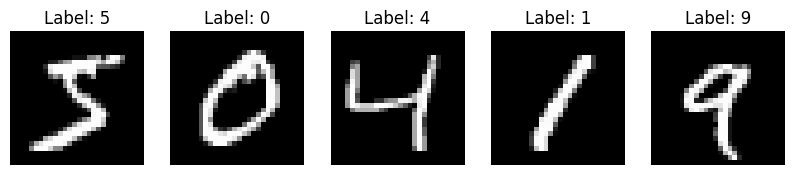

In [5]:
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

#Model building


In [6]:

model = tf.keras.Sequential(
    [
        tf.keras.Input(shape=(28,28,1)),
        tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
        tf.keras.layers.MaxPool2D(),
        tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
        tf.keras.layers.MaxPool2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128,'relu'),
        tf.keras.layers.Dense(10,'softmax')
      ]
  )


#Model training

In [13]:
class myCallBack(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=None):
    if logs['loss'] < 0.0035 :
      print("loss is low")
      self.model.stop_training = True


In [14]:

model.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train, y_train , epochs = 20, callbacks=[myCallBack()])

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9987 - loss: 0.0048
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9993 - loss: 0.0023
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9986 - loss: 0.0059
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9992 - loss: 0.0029
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9992 - loss: 0.0032
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9988 - loss: 0.0032
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9998 - loss: 0.0011
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9985 - loss: 0.0057
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9998 - loss: 8.2630e-04
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9993 - loss: 0.0039
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9993 - loss: 0.0026
Epoch 12/20
1875/1875

In [11]:
results = model.evaluate(X_test, y_test)
print("test loss, test acc:", results)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9872 - loss: 0.0691
test loss, test acc: [0.047983407974243164, 0.991100013256073]


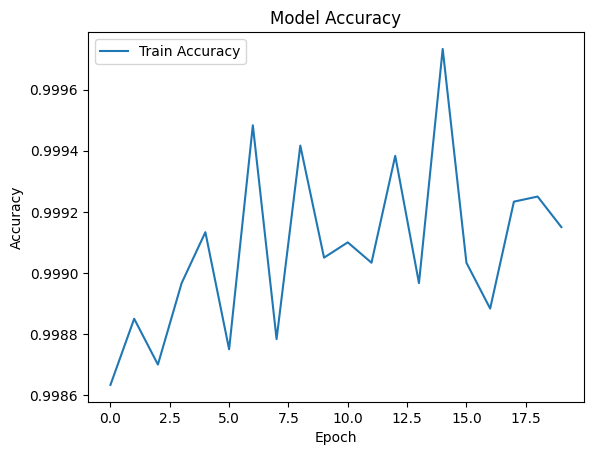

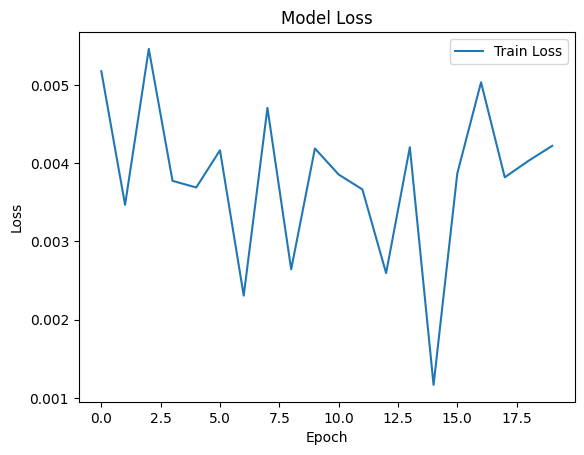

In [16]:
# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Train Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
